In [1]:
# standard libraries
import numpy as np #numpy warnings may be safely ignored, known issue.
import pandas as pd
from collections import defaultdict
import datetime as dt
import scipy.stats as st

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nr_dict = defaultdict()
for x in [2010 + x for x in range(8)] :
    nr_dict[x] = pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/" \
                             +str(x)+"/NiceRide_trip_history_"+str(x)+".csv")
nr_year = pd.concat(nr_dict)

In [3]:
nr_year.keys()

Index(['Start_date', 'Start_name', 'Start_id', 'End_date', 'End_name',
       'End_id', 'duration', 'account'],
      dtype='object')

In [4]:
# We'll only be dealing with ride duration and account affiliation for this data
nr_year = nr_year.drop(['Start_date', 'Start_name', 'Start_id', 'End_date', 'End_name','End_id'], axis=1)

In [5]:
nr_year.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2683289 entries, (2010, 0) to (2017, 459902)
Data columns (total 2 columns):
duration    int64
account     object
dtypes: int64(1), object(1)
memory usage: 57.4+ MB


### Function calls

In [6]:
'''Function call to compute the Empirical Cumulative Distribution Function (ECDF)'''
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    #Returns a coordinate set of the data: x, y
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

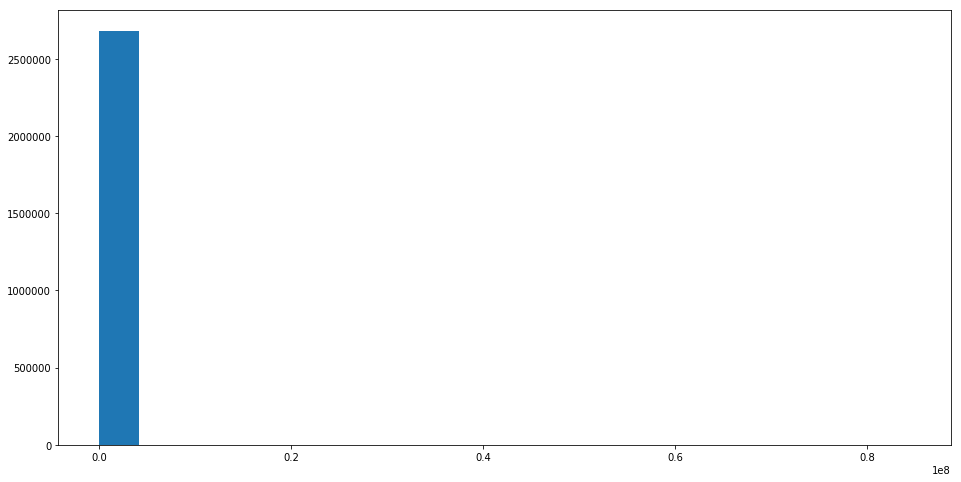

In [7]:
plt.figure(figsize=[16,8])
plt.hist(nr_year.duration, bins=20)
plt.show()

## Outlier identification, reasoning, and removal

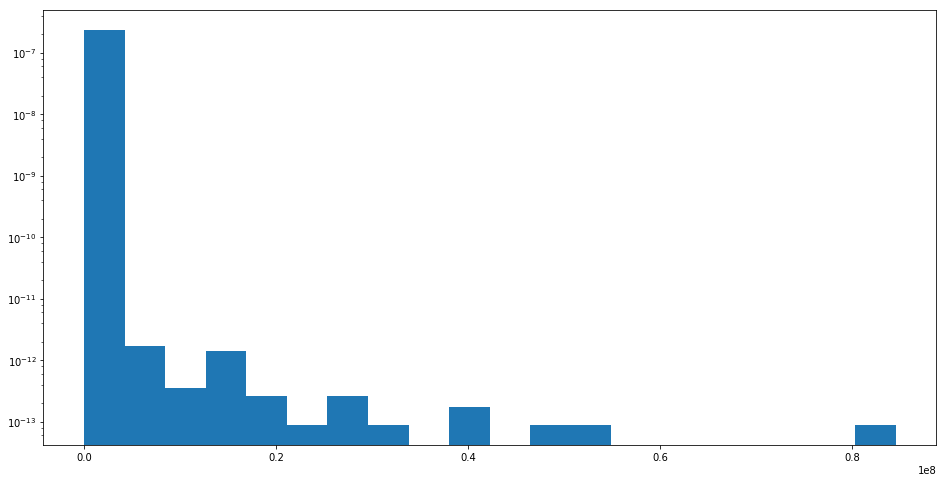

In [8]:
plt.figure(figsize=[16,8])
plt.hist(nr_year.duration, normed=True, log=True, bins=20)
plt.show()

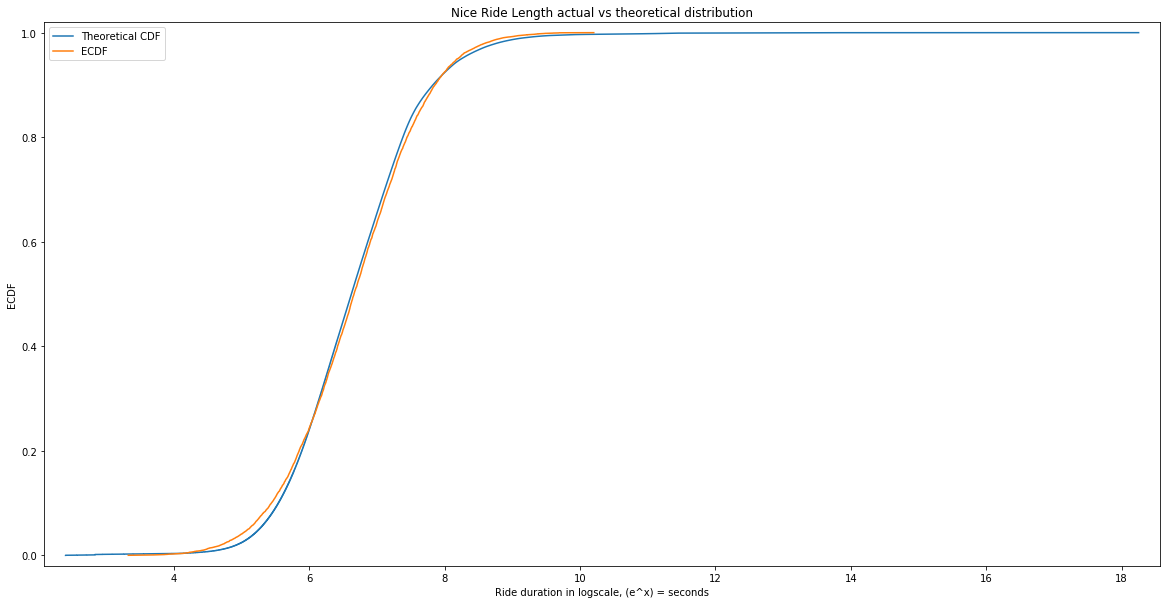

In [9]:
# calculating the cdf from the empirical data set
plt.figure(figsize=[20,10])
x, y = ecdf(np.log(nr_year.duration.values))
plt.plot(x, y)

# calculating a theoretical normal distribution from the mean and std. dev. of the empirical temperature data
theo_dist = np.random.normal(np.mean(np.log(nr_year.duration)), np.std(np.log(nr_year.duration)), size=10000)
x_theo, y_theo = ecdf(theo_dist)

plt.plot(x_theo,y_theo)
plt.title('Nice Ride Length actual vs theoretical distribution')
plt.ylabel('ECDF')
plt.xlabel('Ride duration in logscale, (e^x) = seconds')
plt.margins(.02)
plt.legend(('Theoretical CDF','ECDF'))
plt.show()

In [10]:
def df_sum_formed(nr, percentiles=None):
    '''
    Takes a hierarchal dataframe by year, with a column 'duration' containing numeric ride lengths
    Percentiles can be formated by passing a float, or an array of floats. Default is .25, .5, .75 set as None
    
    Returns a summary dataframe (describe method) with values as formatted objects
    '''
    # Unit testing should be added to check dtypes
    tmp = pd.DataFrame(columns = ["201" + str(x) for x in range(8)])
    
    for x in [2010 + x for x in range(8)] :
        tmp[str(x)] = nr.loc[x].duration.describe(percentiles=percentiles).map('{:,.2f}'.format)
    
    return tmp

In [11]:
df_sum_formed(nr_year, percentiles=[.25, .5, .75,.999])

,2010,2011,2012,2013,2014,2015,2016,2017
count,"99,062.00","216,430.00","273,437.00","307,498.00","411,878.00","483,099.00","431,982.00","459,903.00"
mean,"2,142.98","1,190.18","1,736.00","2,210.73","2,314.49","1,759.58","1,866.82","2,256.80"
std,"127,512.02","5,056.36","179,603.19","173,580.11","102,683.13","22,175.84","43,191.75","43,529.32"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,370.00,369.00,387.00,432.00,436.00,439.00,409.00,408.00
50%,714.00,633.00,677.00,759.00,800.00,801.00,762.00,763.00
75%,"1,382.00","1,145.00","1,228.00","1,318.00","1,502.00","1,474.00","1,456.00","1,481.00"
99.9%,"84,271.09","56,390.24","59,050.68","53,517.04","85,104.12","86,527.73","142,999.18","164,338.49"
max,"39,944,744.00","1,007,464.00","84,494,340.00","54,851,655.00","25,815,044.00","6,419,869.00","16,802,621.00","11,354,802.00"


In [12]:
def df_sum(nr, percentiles=None):
    '''
    Takes a hierarchal dataframe by year, with a column 'duration' containing numeric ride lengths
    Percentiles can be formated by passing a float, or an array of floats. Default is .25, .5, .75 set as None
    
    Returns a summary dataframe (describe method) with values as ints
    '''
    # Unit testing should be added to check dtypes
    tmp = pd.DataFrame(columns = ["201" + str(x) for x in range(8)])
    
    for x in [2010 + x for x in range(8)] :
        tmp[str(x)] = nr.loc[x].duration.describe(percentiles=percentiles)
    
    return tmp

In [13]:
def mcsm_graph(summary) :
    '''
    Takes a summary dataframe and produces visualizations from it
    Will produce a graph of the summaries: Mean, Count, Std. Dev., and Max
    '''
    plt.figure(figsize=[10,10])
    plt.subplot(2,2,1)
    summary.loc['mean'].plot(kind='bar', title='Ride Mean')
    plt.subplot(2,2,2)
    summary.loc['count'].plot(kind='bar', title='Total rides')
    plt.subplot(2,2,3)
    summary.loc['std'].plot(kind='bar', title='Ride length std')
    plt.subplot(2,2,4)
    summary.loc['max'].plot(kind='bar', title='Ride max length')
    plt.tight_layout()
    plt.show()

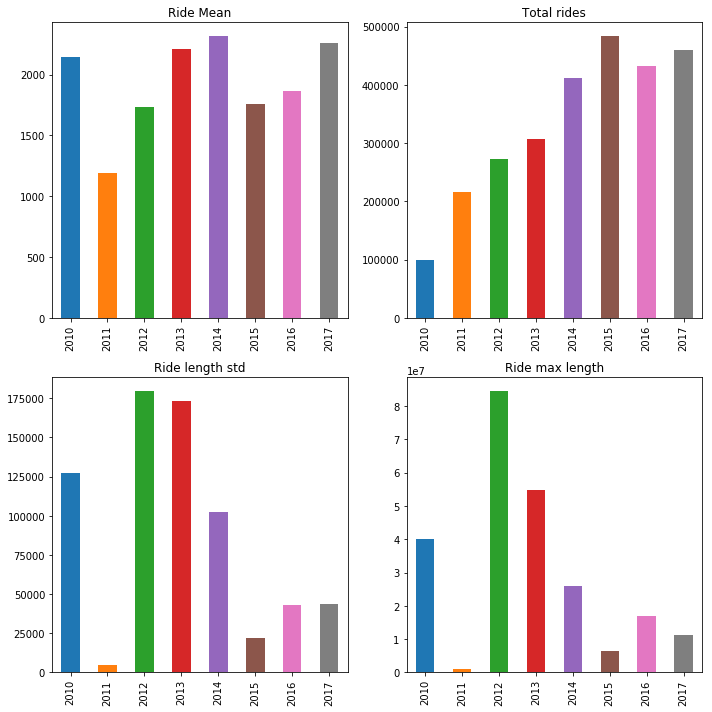

In [14]:
mcsm_graph(df_sum(nr_year))

In [15]:
for x in [2010 + x for x in range(8)] :
    print(str(x), 'Total time rode by all users: ')
    print(dt.timedelta(seconds=sum(nr_year.loc[x].duration)),'\n')

2010 Total time rode by all users: 
2457 days, 0:43:44 

2011 Total time rode by all users: 
2981 days, 8:45:44 

2012 Total time rode by all users: 
5494 days, 1:44:59 

2013 Total time rode by all users: 
7868 days, 0:15:12 

2014 Total time rode by all users: 
11033 days, 9:38:11 

2015 Total time rode by all users: 
9838 days, 13:47:06 

2016 Total time rode by all users: 
9333 days, 17:17:30 

2017 Total time rode by all users: 
12012 days, 19:47:41 



In [16]:
for x in [2010 + x for x in range(8)] :
    print(str(x), 'Top ten ride lengths by user: ')
    print(sorted(nr_year.loc[x].duration.values)[-10:],'\n')

2010 Top ten ride lengths by user: 
[359383, 393952, 407876, 500060, 552032, 568872, 1006692, 1608263, 2655652, 39944744] 

2011 Top ten ride lengths by user: 
[253539, 257561, 274077, 282971, 317716, 348415, 355459, 584322, 854874, 1007464] 

2012 Top ten ride lengths by user: 
[577458, 710240, 972571, 1149171, 1582115, 1752889, 2063847, 5866947, 40358553, 84494340] 

2013 Top ten ride lengths by user: 
[6044428, 7624044, 17768111, 19050276, 21605212, 27372629, 28324012, 32292835, 48552976, 54851655] 

2014 Top ten ride lengths by user: 
[14239800, 15758508, 15799021, 15841339, 15994636, 16056385, 16520526, 16643299, 18154867, 25815044] 

2015 Top ten ride lengths by user: 
[1899421, 2102199, 2578176, 2687672, 3484087, 3560786, 4174262, 4803749, 5307169, 6419869] 

2016 Top ten ride lengths by user: 
[3645886, 4036665, 4597028, 4606363, 5021150, 5453261, 6748568, 9674947, 9962123, 16802621] 

2017 Top ten ride lengths by user: 
[4178850, 4227854, 4497111, 5183609, 5201563, 6799678, 69

_Assuming an eight (8) month riding window, March until October. Five (5) months with 31 days, three (3) without, for a total of 245 days in a given Niceride season. The longest ride a user could have a bike is: 21,168,000 seconds. The years 2010,2012,2013,2014 all have rides that go longer than this. The 2012 longest ride is ~978 days long, ~32.6 months, or ~2.68 years. We'll consider for (non-)member usage EDA that 2 day(s) will be out cut off point, or 172,800 seconds. The 99.5% quartile mean for all 7 years is approx. ~16,712.59. The 99.9% quartile is ~94,524. This will cover over 99.9% of all data points in our ride durations._

In [17]:
nr_year = nr_year[nr_year.duration <= 172800]

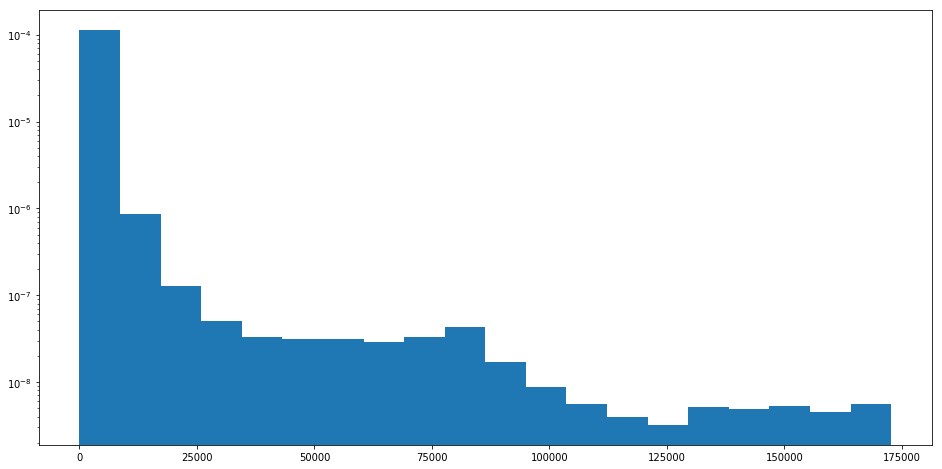

In [18]:
plt.figure(figsize=[16,8])
plt.hist(nr_year.duration, normed=True, log=True, bins=20)
plt.show()

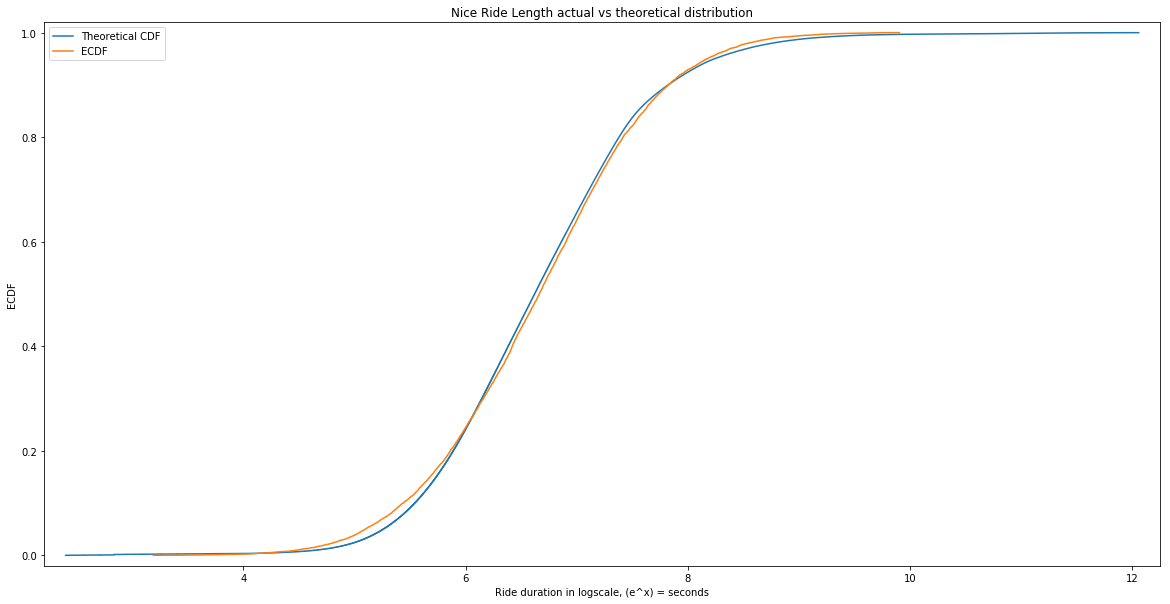

In [19]:
# calculating the cdf from the empirical data set
plt.figure(figsize=[20,10])
x, y = ecdf(np.log(nr_year.duration.values))
plt.plot(x, y)

# calculating a theoretical normal distribution from the mean and std. dev. of the empirical temperature data
theo_dist = np.random.normal(np.mean(np.log(nr_year.duration)), np.std(np.log(nr_year.duration)), size=10000)
x_theo, y_theo = ecdf(theo_dist)

plt.plot(x_theo,y_theo)
plt.title('Nice Ride Length actual vs theoretical distribution')
plt.ylabel('ECDF')
plt.xlabel('Ride duration in logscale, (e^x) = seconds')
plt.margins(.02)
plt.legend(('Theoretical CDF','ECDF'))
plt.show()

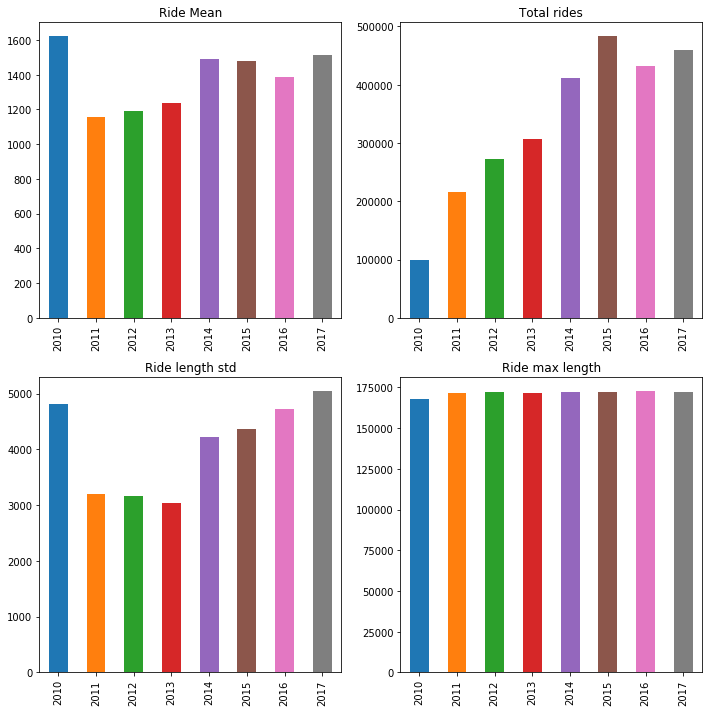

In [20]:
mcsm_graph(df_sum(nr_year))

_User ride lengths appear to be more in line year over year and stable than before_

In [21]:
for x in [2010 + x for x in range(8)] :
    print(str(x), 'Total time ridden by all users: ')
    print(dt.timedelta(seconds=sum(nr_year.loc[x].duration)),'\n')

2010 Total time ridden by all users: 
1857 days, 17:02:23 

2011 Total time ridden by all users: 
2894 days, 4:19:21 

2012 Total time ridden by all users: 
3776 days, 3:40:01 

2013 Total time ridden by all users: 
4410 days, 12:01:35 

2014 Total time ridden by all users: 
7094 days, 2:11:44 

2015 Total time ridden by all users: 
8270 days, 0:22:30 

2016 Total time ridden by all users: 
6921 days, 10:56:52 

2017 Total time ridden by all users: 
8062 days, 17:40:44 



_Total time now reflects more closely to total rides taken by year._

In [22]:
df_sum_formed(nr_year)

,2010,2011,2012,2013,2014,2015,2016,2017
count,"99,037.00","216,405.00","273,392.00","307,429.00","411,705.00","482,872.00","431,690.00","459,471.00"
mean,"1,620.67","1,155.51","1,193.38","1,239.53","1,488.76","1,479.75","1,385.29","1,516.14"
std,"4,814.70","3,204.77","3,164.28","3,042.77","4,229.46","4,371.54","4,716.09","5,046.07"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,369.00,369.00,387.00,432.00,436.00,439.00,409.00,407.00
50%,714.00,633.00,677.00,759.00,800.00,801.00,762.00,762.00
75%,"1,382.00","1,144.00","1,227.00","1,318.00","1,501.00","1,473.00","1,454.00","1,479.00"
max,"167,561.00","171,773.00","172,031.00","171,432.00","172,420.00","172,328.00","172,732.00","172,135.00"


## The members vs casual user breakdown

In [23]:
nr_year.account.value_counts()

Member    1564706
Casual    1117295
Name: account, dtype: int64

In [24]:
nr_member = nr_year[nr_year.account == 'Member']
nr_casual = nr_year[nr_year.account == 'Casual']

In [25]:
df_sum_formed(nr_member)

,2010,2011,2012,2013,2014,2015,2016,2017
count,"46,666.00","147,140.00","169,101.00","176,876.00","209,770.00","243,724.00","281,937.00","289,492.00"
mean,625.86,657.77,642.68,677.84,852.05,882.27,877.04,858.00
std,"1,729.23","1,688.22","1,470.50","1,204.81","1,604.02","1,680.14","2,208.10","2,053.79"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,274.00,307.00,307.00,337.00,354.00,359.00,335.00,323.00
50%,449.00,484.00,491.00,535.00,583.00,585.00,552.00,535.00
75%,751.00,785.00,793.00,855.00,"1,031.00","1,063.00","1,014.00",974.00
max,"157,634.00","171,773.00","172,031.00","168,779.00","162,259.00","164,451.00","170,544.00","171,729.00"


In [26]:
nr_member.duration.mean()

795.025585637174

In [27]:
df_sum_formed(nr_casual)

,2010,2011,2012,2013,2014,2015,2016,2017
count,"52,371.00","69,265.00","104,291.00","130,553.00","201,935.00","239,148.00","149,753.00","169,979.00"
mean,"2,507.11","2,212.84","2,086.29","2,000.52","2,150.17","2,088.66","2,342.15","2,637.01"
std,"6,285.35","4,938.62","4,631.69","4,339.24","5,739.29","5,913.97","7,316.71","7,723.41"
min,11.00,11.00,11.00,11.00,11.00,60.00,60.00,60.00
25%,620.00,751.00,742.00,773.00,619.00,609.00,810.00,820.00
50%,"1,163.00","1,261.00","1,246.00","1,269.00","1,138.00","1,099.00","1,333.00","1,364.00"
75%,"2,316.00","2,165.00","2,061.50","2,053.00","2,013.00","1,855.00","2,083.00","2,173.00"
max,"167,561.00","171,620.00","168,302.00","171,432.00","172,420.00","172,328.00","172,732.00","172,135.00"


In [28]:
nr_casual.duration.mean()

2233.968652862494

_The average casual user rides for ~37.23 minutes, being charged by the half hour or unlimited 30 minute rides all day._

_The average member user rides for ~13.25 minutes, being charged for only for ride over 60 minutes. After membership fees_

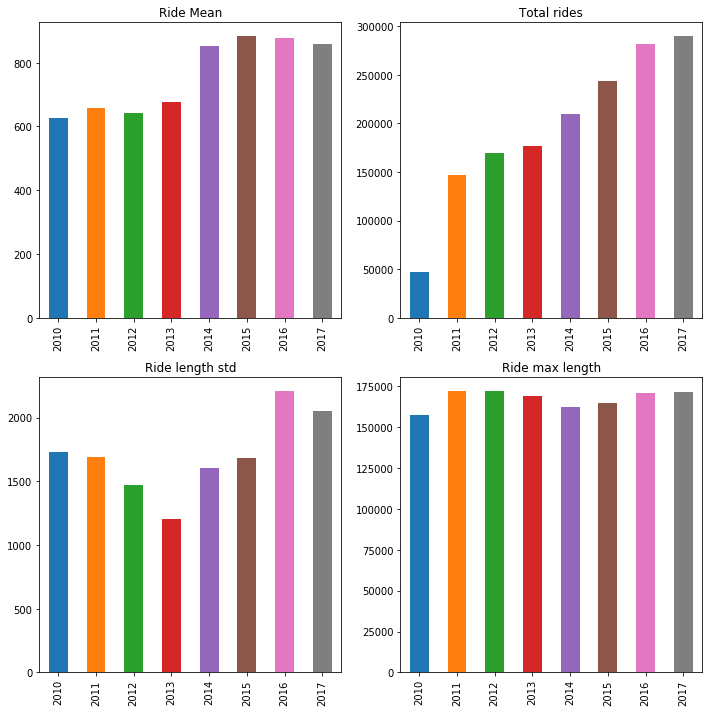

In [29]:
mcsm_graph(df_sum(nr_member))

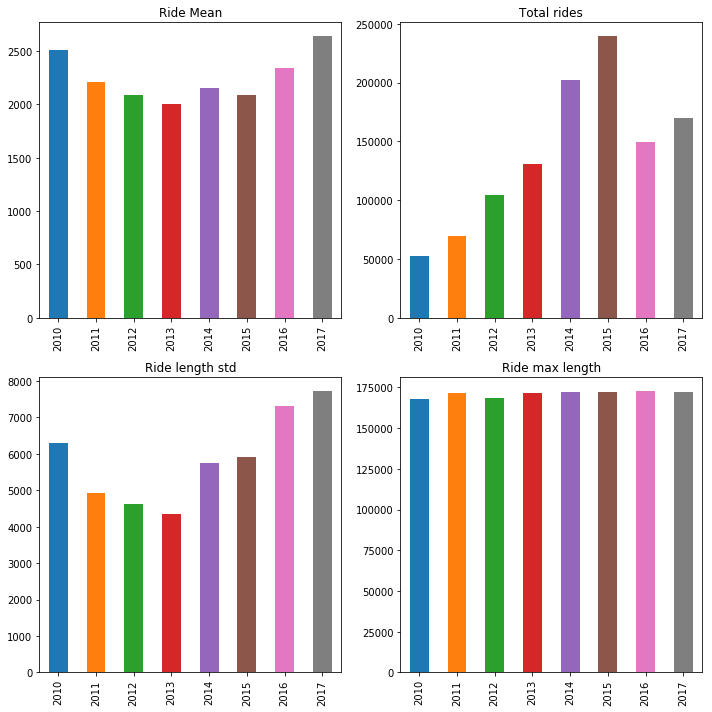

In [30]:
mcsm_graph(df_sum(nr_casual))

## Trends for members and casual users:
* Members:
    * Slower but sustained increase in total member rides per year.
    * Mean rides maintained stable through 2013, then jumped in 2014 and leveled again.
* Casuals:
    * Fast increase in total casual rides per year, marked decrease in 2016 and 2017.
    * Mean ride lengths decreased till 2013 then began to increase through 2017.

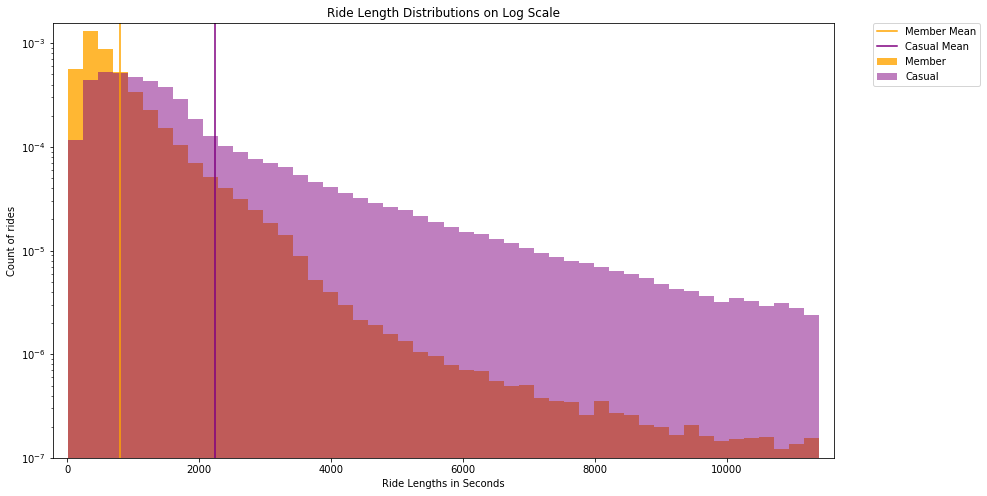

In [31]:
# range setup
xmax = nr_casual.duration.values.mean()+nr_casual.duration.values.std()*1.5
xmin = nr_casual.duration.values.min()

plt.figure(figsize=[14,8])

_ = plt.hist(nr_member.duration.values, normed=True, log=True, bins=50, alpha=.8, color = 'orange', Label='Member',\
             range=(xmin, xmax))
_ = plt.hist(nr_casual.duration.values, normed=True, log=True, bins=50, alpha=.5, color = 'purple', Label='Casual',\
             range=(xmin, xmax))
# Work on getting appropriate range set up

plt.axvline(nr_member.duration.mean(), color= 'orange', Label='Member Mean')
plt.axvline(nr_casual.duration.mean(), color= 'purple', Label='Casual Mean')

plt.xlabel('Ride Lengths in Seconds')
plt.ylabel('Count of rides')
plt.title('Ride Length Distributions on Log Scale')

plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [32]:
member = np.log(nr_member.duration.values)
casual = np.log(nr_casual.duration.values)

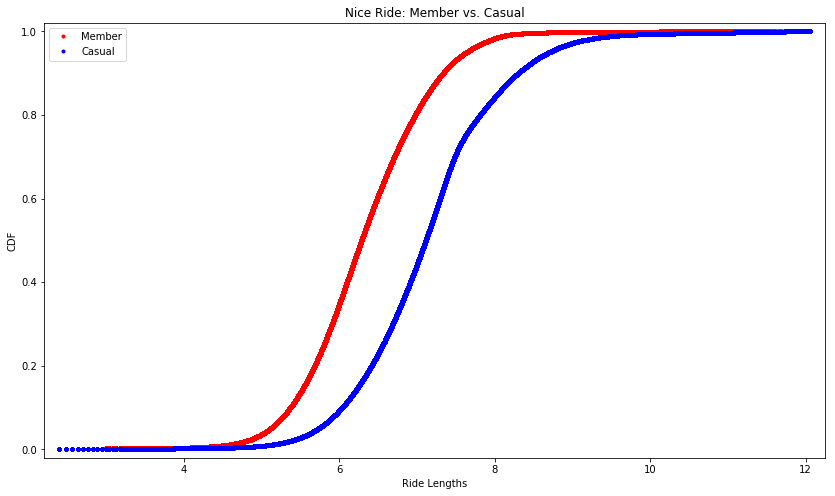

In [33]:
m_x, m_y = ecdf(member)
c_x, c_y = ecdf(casual)

plt.figure(figsize=[14,8])
plt.plot(m_x, m_y, marker='.', linestyle='none', color='red')
plt.plot(c_x, c_y, marker='.', linestyle='none', color='blue')

plt.title('Nice Ride: Member vs. Casual')
plt.ylabel('CDF')
plt.xlabel('Ride Lengths')
plt.margins(.02)
plt.legend(('Member','Casual'))
plt.show()

_Using a two-sample z-test to find p-value we'll compare our member and casual riders mean ride length time. Ride length time is a major component of how the rider is billed

$H_0$: The mean casual ride length ($\mu$) and mean member ride length ($\mu_0$) are the same, $\mu$ = $\mu_0$. $\alpha$ = 0.05

$H_A$: The mean ride lengths are not equal. $\mu\neq\mu_0$.

In [34]:
# Standard Error
stan_err = np.sqrt((np.std(casual)**2) / len(casual) + (np.std(member)**2) / len(member))
print(f'{stan_err:.10f}')

moe = 1.96 * stan_err # Margin of Error
print(f'{moe:.10f}')

0.0010883292
0.0021331253


In [35]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    return np.mean(data_1) - np.mean(data_2)

In [36]:
numerator = diff_of_means(casual, member) #x1bar - x2bar - delta (0)
z = numerator / stan_err # Standard Error == denominator
pval = st.norm.cdf(-z) * 2 # Why am I using -z?
print('Z score: ', f'{z:.5f}')
print('P-value: ', f'{pval:.7f}')

Z score:  749.85580
P-value:  0.0000000


In [37]:
print(len(member))
print(len(casual))

1564706
1117295


The probability, p-value: 0.0000000 that is shown by the red, result z-val line is:  749.8557980661
The values we'd need for 95%, and 99% confidence are shown in orange and purple


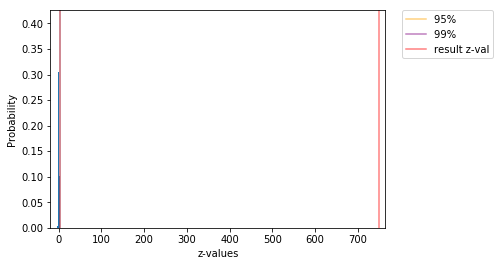

In [38]:
deg_free = len(casual) - 1 # degrees of freedom = (n-1)
plt.hist(np.random.standard_t(deg_free, size=100000), bins=100, normed=True)

plt.axvline(1.98, linestyle='-', label='95% ', color='orange', alpha=.5)
plt.axvline(2.62, linestyle='-', label='99% ', color='purple', alpha=.5)
plt.axvline(z, linestyle='-', label='result z-val', color='red', alpha=.5)

plt.xlabel('z-values')
plt.ylabel('Probability')
plt.margins(.02)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot()

print('The probability, p-value:',f'{pval:.7f}', 'that is shown by the red, result z-val line is: ', f'{z:.10f}')
print('The values we\'d need for 95%, and 99% confidence are shown in orange and purple')

In [39]:
print('Our p-value, ', pval, ' needs to be equal or greater than our alpha, 0.025.')
if pval < 0.025 : 
    print('Assuming the means are equal, this result could be observed in approximately', f'{pval:.4f}', '% of samples')
    print('Our null hypothesis is probabalistically false')
else : print('Our null hypothesis is probabalistically true')

Our p-value,  0.0  needs to be equal or greater than our alpha, 0.025.
Assuming the means are equal, this result could be observed in approximately 0.0000 % of samples
Our null hypothesis is probabalistically false


_We can definitively say that member and casual users mean ride length time is different with statistical significance_